# DS100 Group Project: Analysis of Tetouan City Power Consumption


A Group Project for University of British Columbia (UBC) Data Science Course 

### Introduction

> &emsp; The term “power consumption” describes the amount of electrical energy that is used per unit time. In a 2018 study (Angrisani et al.), optimizing power consumption was identified as a fundamental goal in modern smart energy management. Accurate energy-use predictions are helpful in this optimization process as it allows for facilities to better operate systems in a way that maximizes efficiency while still being conscious of their power consumption (Salam & Hibaoui, 2018). In our project, we examine the power consumption of Tetouan city, Morocco, using datasets from the UCI Machine Learning Repository. The datasets present information on the power consumption of three zones in Tetouan in 2017. It provides information such as the date, time, temperature, and humidity of the area when the data was collected. We are using this data to answer our research question: Using the parameters of temperature, humidity, wind speed, and general diffuse flows against total power consumption, how well can we predict the total power consumption of Tetouan city?

In [1]:
library(tidyverse)
library(cowplot)
library(scales)
library(repr)
library(tidymodels)
library(readr)
library(stringr)
library(gridExtra)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ──────────

### Methods & Results

**Reading and organizing data**

><p>&emsp;Here we take the CSV file "Tetuan City power consumption.csv" as an electric dataframe. Then, we use the function "colnames" to set the names of the columns into non-string variables that can be easily called upon. For instance, we have renamed the column "Zone 1 Power Consumption" as "Zone.1.Power.Consumption".</p>
><p>&emsp;Since the original file has 52416 rows of data, the runtime is significantly long. To resolve this issue, we take a random sample of 3000 to the Electricity dataframe, then apply a seed to establish good sampling techniques and ensure that randomization results in the same values each time. We use drop_na() to remove any empty rows of information. This allows us to avoid any future errors that the empty rows could cause. Furthermore, we added the three zones' power consumption into a special TotalPower column using the "mutate" function. We will be using Total Power as a quantitative variable throughout our analysis.</p>

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'

electric <- read_csv(url) 

colnames(electric) <- make.names(colnames(electric))

electric0 <- electric %>%
    mutate(TotalPower = (Zone.1.Power.Consumption + Zone.2..Power.Consumption + Zone.3..Power.Consumption  )) %>%
    drop_na()

print(count(electric0)) #52416

set.seed(1234)
Electricity <- sample_n(electric0, 3000)
print(count(Electricity))

Electricity

Parsed with column specification:
cols(
  DateTime = col_character(),
  Temperature = col_double(),
  Humidity = col_double(),
  `Wind Speed` = col_double(),
  `general diffuse flows` = col_double(),
  `diffuse flows` = col_double(),
  `Zone 1 Power Consumption` = col_double(),
  `Zone 2  Power Consumption` = col_double(),
  `Zone 3  Power Consumption` = col_double()
)



# A tibble: 1 x 1
      n
  <int>
1 52416
# A tibble: 1 x 1
      n
  <int>
1  3000


DateTime,Temperature,Humidity,Wind.Speed,general.diffuse.flows,diffuse.flows,Zone.1.Power.Consumption,Zone.2..Power.Consumption,Zone.3..Power.Consumption,TotalPower
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10/11/2017 5:10,20.78,70.60,0.173,0.029,0.156,27445.08,16382.99,11840.973,55669.04
10/11/2017 16:50,24.29,56.42,0.081,84.700,69.500,35265.82,21853.94,13189.058,70308.82
10/19/2017 9:50,19.83,80.20,0.064,49.050,42.640,33765.95,20767.22,12984.802,67517.97
4/16/2017 20:00,18.29,68.84,0.079,1.573,1.479,42409.47,21603.67,28282.182,92295.32
8/23/2017 0:50,21.72,54.75,4.923,0.058,0.085,32993.74,22147.41,23774.295,78915.45
9/6/2017 0:30,22.92,70.60,0.264,0.066,0.100,31425.13,19092.72,16962.288,67480.14
5/2/2017 10:20,23.00,52.65,0.085,535.500,185.600,34270.43,21730.03,15519.352,71519.81
4/16/2017 16:30,19.97,62.01,0.073,573.000,602.700,28744.20,15345.82,18589.091,62679.11
5/18/2017 18:10,23.99,55.91,4.919,293.300,119.600,33930.49,21221.05,17623.968,72775.51


**Exploratory Data Analysis**

>&emsp;To begin, we will look at some of the available variables that we can analyze. We take the correlation coefficents of the variables (Temperature, Wind Speed, Humidity, and General Diffuse Flows) against the Total Power consumption of the three zones. We then produce the summary, which gives us information on the mean, median, quantiles, and max/min of the variables. From there, we can have an exploratory analysis on the relationship between each individual variable to the total power consumption of the three zones. 

`geom_smooth()` using formula 'y ~ x'



[1] 0.5130095


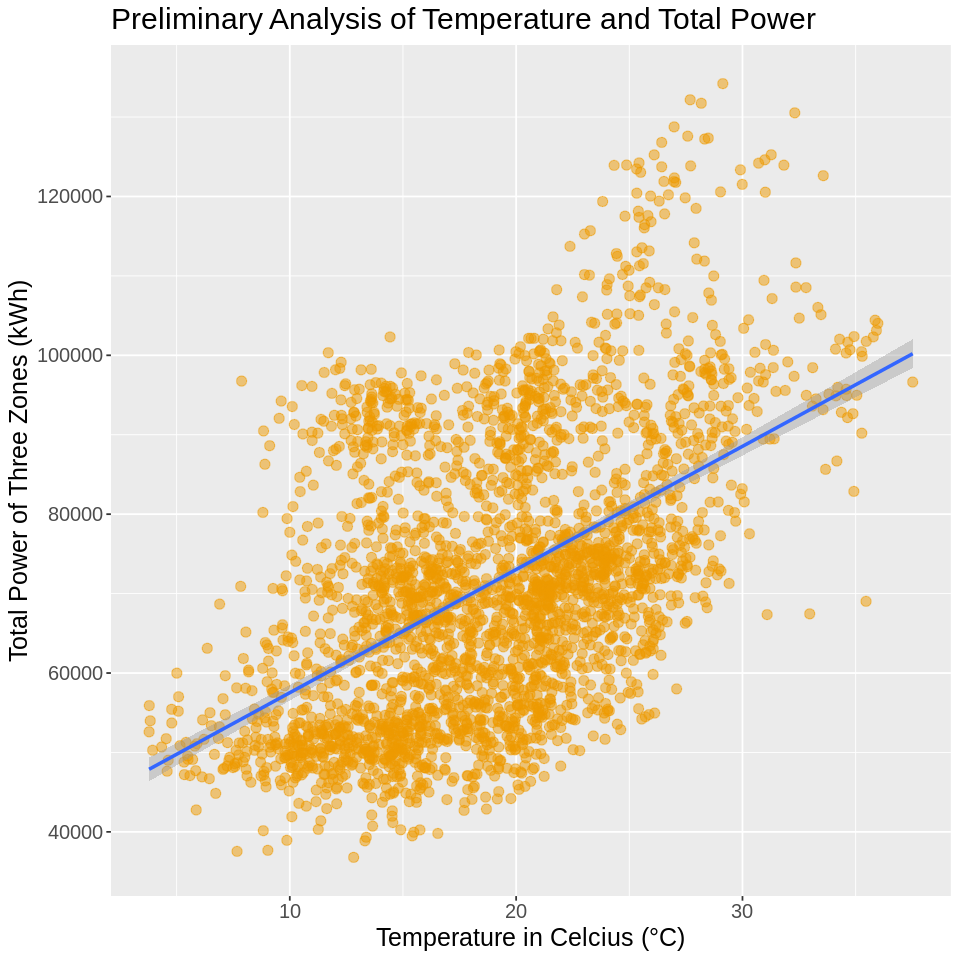

In [3]:
options(repr.plot.width = 8, repr.plot.height = 8)

Electricity_PrelimTemp <- ggplot(Electricity,  aes(x= Temperature, y= TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2")  +
    geom_smooth(method=lm) +
    labs(x = "Temperature in Celcius (°C)", y = "Total Power of Three Zones (kWh)", 
    title = "Preliminary Analysis of Temperature and Total Power") + 
    theme(text = element_text(size = 15))
    
Electricity_PrelimTemp

print(cor(Electricity$Temperature, Electricity$TotalPower)) # Correlation of Total Power  and Temperature

In [4]:
summary(Electricity$Temperature)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.784  14.568  19.015  18.893  22.920  37.520 

**Preliminary Analysis of Humidity to Total Power**

`geom_smooth()` using formula 'y ~ x'



[1] -0.2526399


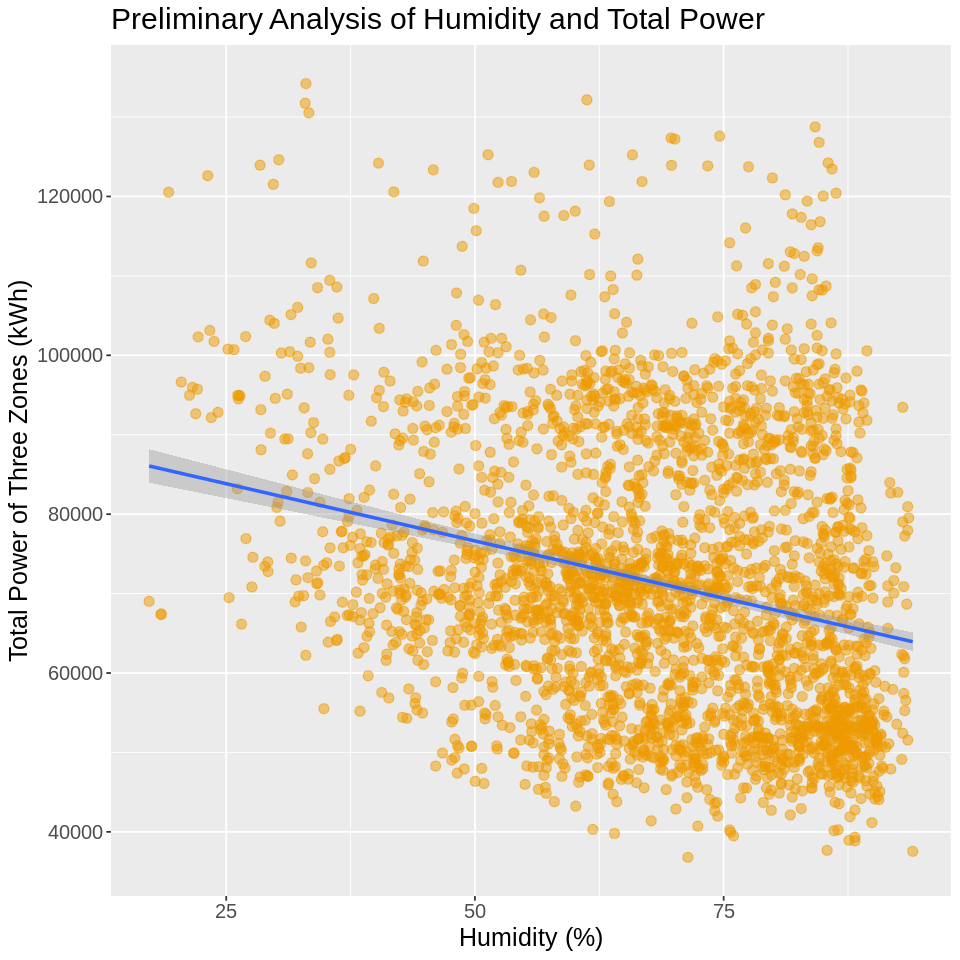

In [5]:
options(repr.plot.width = 8, repr.plot.height = 8)

Electricity_PrelimHumid <- ggplot(Electricity,  aes(x= Humidity, y= TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") +
    geom_smooth(method=lm) +
    labs(x = "Humidity (%)", y = "Total Power of Three Zones (kWh)", 
        title = "Preliminary Analysis of Humidity and Total Power") +
    theme(text = element_text(size = 15))

    
Electricity_PrelimHumid

print(cor(Electricity$Humidity, Electricity$TotalPower)) #Correlation of Total Power  and Temperature

In [6]:
summary(Electricity$Humidity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.25   58.89   69.80   68.43   81.20   94.00 

**Preliminary Analsis of Wind Speed to Total Power**

`geom_smooth()` using formula 'y ~ x'



[1] 0.2401595


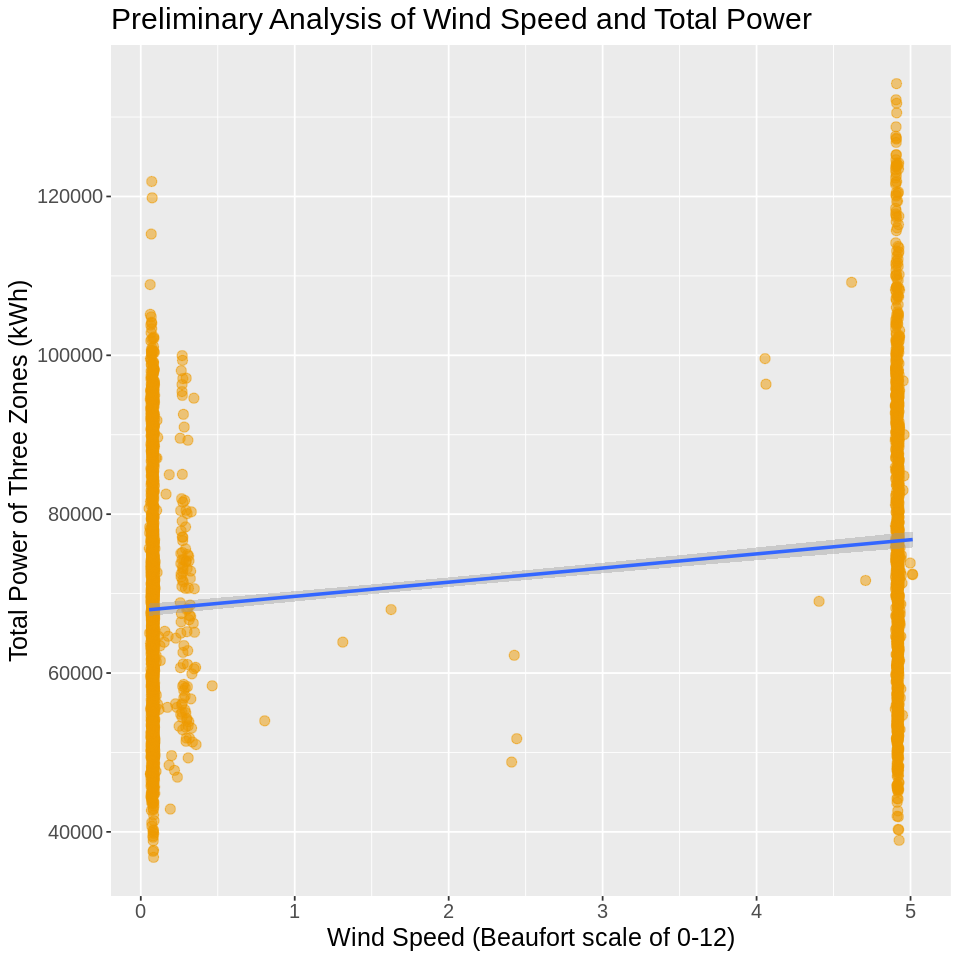

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

Electricity_PrelimWind <- ggplot(Electricity,  aes(x= Wind.Speed, y= TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") +
    geom_smooth(method=lm) +
    labs(x = "Wind Speed (Beaufort scale of 0-12)", y = "Total Power of Three Zones (kWh)", 
        title = "Preliminary Analysis of Wind Speed and Total Power") +
    theme(text = element_text(size = 15))
    
Electricity_PrelimWind

print(cor(Electricity$Wind.Speed, Electricity$TotalPower)) #Correlation of Total Power  and Temperature

In [8]:
summary(Electricity$Wind.Speed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.054   0.078   0.085   1.932   4.914   5.014 

**Preliminary Analysis of Wind Speed to Total Power**

`geom_smooth()` using formula 'y ~ x'



[1] 0.1418277


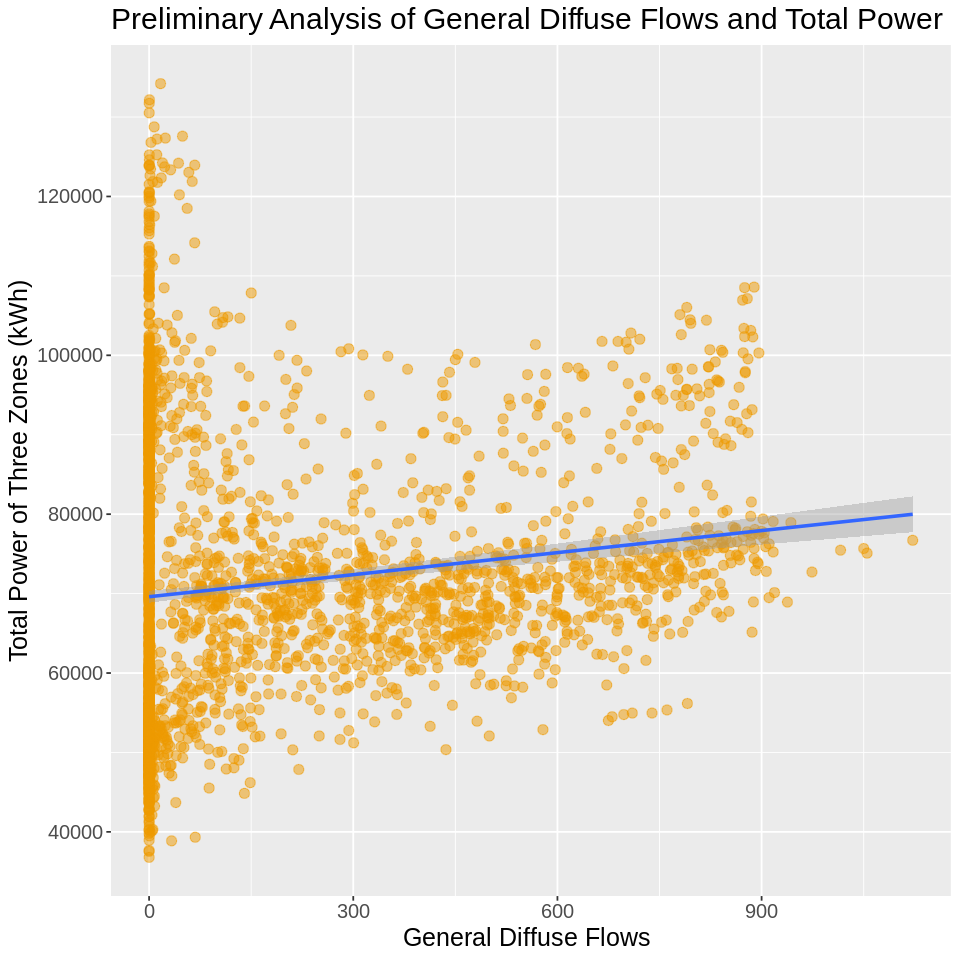

In [9]:
options(repr.plot.width = 8, repr.plot.height = 8)

Electricity_PrelimGenDiff <- ggplot(Electricity,  aes(x= general.diffuse.flows, y= TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") +
    geom_smooth(method=lm) +
    labs(x = "General Diffuse Flows ", y = "Total Power of Three Zones (kWh)", 
         title = "Preliminary Analysis of General Diffuse Flows and Total Power") + 
    theme(text = element_text(size = 15))
    
Electricity_PrelimGenDiff

print(cor(Electricity$general.diffuse.flows, Electricity$TotalPower)) #Correlation of Total Power  and Temperature

In [10]:
summary(Electricity$general.diffuse.flows)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.007    0.062    5.624  184.623  331.575 1122.000 

> &emsp; From exploratory our analysis, we can determine that Temperature has the strongest relationship with Total Power out of the four variables we are investigating in our analysis. The correlation values for the each variable are as follows: 0.513 (Temperature), -0.252 (Humidity), 0.240 (Wind Speed), 0.142 (General Diffuse Flows). Negative correlation values indicate a negative correlation while positive values indicate a positive correlation. General diffuse flows has the lowest correlation. Hence, although none are models have a very strong positive correlation close to 1, we can conclude that temperature is has the strongest correlation at 0.513 out of all four possible relations to total power consumption. 

**Temperature to Total Power Consumption**

***Methodology***

> Here we are splitting the Electricity dataset into two-- one is for the training under Electricity_train and the other is for testing under Electricity_test. From there, we used prop = 0.75, where 75% of the dataset is split for the training methods while the remaining 25% is used for testing the results later on. Since we use TotalPower as the predicting variable, we set strata for the split as TotalPower. 

> For the first variable, we are taking Temperature values of the different time periods to the total power consumption. Training data of Electricity_Train is used here. To create a receipe, we set the scale and center to be the all predictors. To do this, we implement the recipe from tidymodels and prepare the recipe with Electricty_train data. 

> To train the regression model, we create a model to find the optimal k-nearest neighbour regression. We are specifying which model we are building. We set the weight function to be "rectangular" to better fit the k-nn neighbors. We also set engine as "kknn" and mode as "regression" to inform tidymodels that we are doing k-nn regression.

> Then we are creating a five fold cross validation object using the training dataset and TotalPower as the strata predictor. 

> The  workflow() function allows us to integrate our our recipe and model specifications together in a workflow. 

>  We then use tibble to run a cross validation of the neighbours in a grid from 1 to 200. From there we are able to create and test different models and receive a unique root mean square error (RMSE). Consequently, with Electricity_results, we are able to use the methods and specifications from workflow and test it out with cross validation. We then specify .metric as "rmse" to indicate our study parameter. 


>  We then arrange the result in order and choose the number of neighbours with least rmse, which means it fits the training data best.

> Then with Electricityk_min, this gives us the smallest rmse and the k value associated with this model. Since we are sampling 3000 instances from our dataset of >50000, the k values are not consistent. However, in our multiple run throughs, the RMSE value are very consistent.

> With Electricity_best_spec, we use the selected number of neighbours to build the knn regression model and apply it on the training data.

> With Electricity_summary we predict total power through the model and bind it to the training data set. Then we calculate the rmse.


>  Finally using the model from Electricity_preds, we plot Electricity_plot, which is the the prediction of total power versus temperature. We draw the scatter plot of the actual total power versus temperature and a line plot of prediction of total power versus temperature.

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,20730.55,5,421.9076,Model01
4,rmse,standard,16531.78,5,189.4349,Model02
7,rmse,standard,15793.13,5,251.0116,Model03
10,rmse,standard,15554.47,5,261.8978,Model04
13,rmse,standard,15354.33,5,257.2061,Model05
16,rmse,standard,15252.68,5,254.3762,Model06
19,rmse,standard,15164.19,5,248.2337,Model07
22,rmse,standard,15122.91,5,252.9157,Model08
25,rmse,standard,15081.40,5,227.6980,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
109,rmse,standard,14850.95,5,253.4996,Model37


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.469347e+04
rsq,standard,2.767591e-01
mae,standard,1.181196e+04


.pred,DateTime,Temperature,Humidity,Wind.Speed,general.diffuse.flows,diffuse.flows,Zone.1.Power.Consumption,Zone.2..Power.Consumption,Zone.3..Power.Consumption,TotalPower
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76566.72,10/11/2017 16:50,24.29,56.42,0.081,84.700,69.500,35265.82,21853.94,13189.058,70308.82
70188.01,10/19/2017 9:50,19.83,80.20,0.064,49.050,42.640,33765.95,20767.22,12984.802,67517.97
75524.35,9/6/2017 0:30,22.92,70.60,0.264,0.066,0.100,31425.13,19092.72,16962.288,67480.14
70252.08,4/16/2017 16:30,19.97,62.01,0.073,573.000,602.700,28744.20,15345.82,18589.091,62679.11
76696.25,5/18/2017 18:10,23.99,55.91,4.919,293.300,119.600,33930.49,21221.05,17623.968,72775.51
66323.44,1/19/2017 4:50,12.57,82.60,0.082,0.077,0.134,21041.01,13750.76,14093.494,48885.27
64153.24,1/21/2017 19:50,12.27,61.64,0.083,0.055,0.119,44366.58,27950.15,26810.602,99127.34
81767.70,5/1/2017 16:30,26.07,36.17,0.071,450.900,413.600,29737.97,17862.54,16627.045,64227.55
81825.83,8/19/2017 21:00,25.33,86.30,4.919,0.051,0.144,48617.98,33034.85,38761.129,120413.96


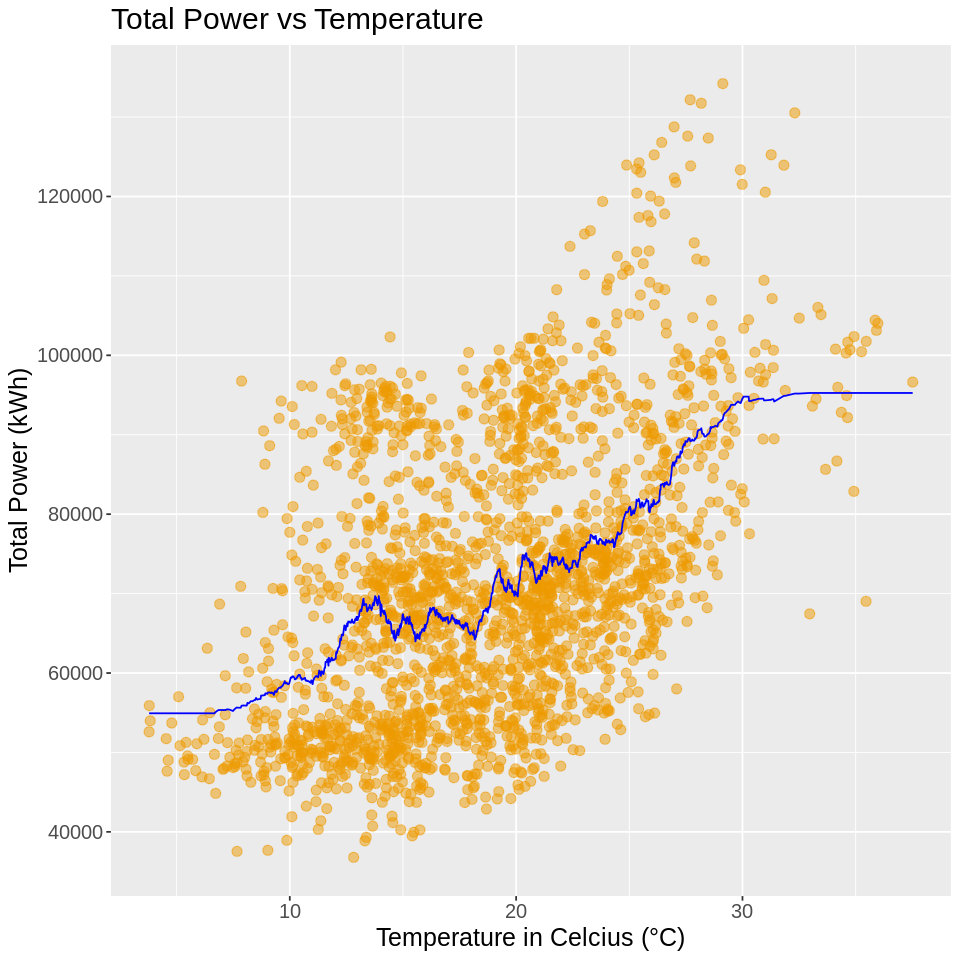

In [11]:
#K-NN Regression Model of the Temperature to Total Power Consumption


#######################

#Here we are splitting the Electricity dataset into two-- one is for the training under Electricity_train and the other is
#for testing under Electricity_test. From there, we used prop = 0.75, where 75% of the dataset is split for the training methods
#while the remaining 25% is used for testing the results later on. Since we use TotalPower as the predicting variable, 
#we set strata for the split as TotalPower. 
Electricity_split <- initial_split(Electricity, prop = 0.75, strata = TotalPower)
Electricity_train <- training(Electricity_split)
Electricity_test <- testing(Electricity_split)


#For the first case of analyzing variable, we are taking Temperature values of the different time periods to the total power consumption. 
#Training data of Electricity_Train is used here. To create a receipe, we set the scale and center to be the all predictors. To do this, 
#we implement the recipe from tidymodels and prepare the recipe with Electricty_train data. 
Electricity_recipe <- recipe(TotalPower ~ Temperature, data = Electricity_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())


#To train the regression model, we create a model to find the optimal k-nearest neighbour regression. We are specifying which 
#model we are building. We set the weight function to be "rectangular" to better fit the k-nn neighbors. We also set engine as 
#"kknn" and mode as "regression" to inform tidymodels that we are doing k-nn regression. 
Electricity_spec <- nearest_neighbor(weight_func = "rectangular", 
    neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")



# Here we are creating a five fold cross validation object using the training dataset and TotalPower as the strata predictor. 
Electricity_vfold <- vfold_cv(Electricity_train, v = 5, strata = TotalPower)


# The # workflow() function allows us to integrate our our recipe and model specifications together in a workflow. 
Electricity_wkflw <- workflow() %>%
  add_recipe(Electricity_recipe) %>%
  add_model(Electricity_spec)
Electricity_wkflw


# We then use tibble to run a cross validation of the neighbours in a grid from 1 to 200. From there we are able to create and test different
#models and receive a unique root mean square error (RMSE). Consequently, with Electricity_results, we are able to use the methods and specfications
# from workflow and test it out with cross validation. We specfically indicate .metric as "rmse" to indicate our study parameter. 
gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))


# Show the results
Electricity_results <- Electricity_wkflw %>%
  tune_grid(resamples = Electricity_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")
Electricity_results


#######################

#Prediction 

# We arrange the result in order and choose the number of neighbours with least rmse, which means it fits the training data best.
Electricity_min <- Electricity_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    filter(mean == min(mean)) %>%
    slice(1)
Electricity_min

#This gives us the smallest rmse and the k value associated with this model. Since we are sampling 3000 instances from our 
#dataset of >50000, the k values are not consistent. However, in our multiple run throughs, the RMSE value are very consistent. 
Electricityk_min <- Electricity_min %>%
          pull(neighbors)

# We use the selected number of neighbours to build the knn regression model and apply it on the training data.
Electricity_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = Electricityk_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")


Electricity_best_fit <- workflow() %>%
          add_recipe(Electricity_recipe) %>%
          add_model(Electricity_best_spec) %>%
          fit(data = Electricity_train)

# We predict total power through the model and bind it to the training data set. Then we calculate the rmse.
Electricity_summary_Temp <- Electricity_best_fit %>%
           predict(Electricity_train) %>%
           bind_cols(Electricity_train) %>%
           metrics(truth = TotalPower, estimate = .pred)
Electricity_summary_Temp


# We plot the prediction of total power versus temperature. We draw the scatter plot of the actual total power versus temperature and a line
# plot of prediction of total power versus temperature.
Electricity_preds <- Electricity_best_fit %>%
    predict(Electricity_train) %>%
    bind_cols(Electricity_train)
Electricity_preds


options(repr.plot.width = 8, repr.plot.height = 8)
Electricity_plot <- Electricity_preds %>%
    ggplot(aes(x = Temperature , y = TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") + 
    labs(y = "Total Power (kWh)", x = "Temperature in Celcius (°C)") +
    geom_line(data = Electricity_preds, mapping = aes(x = Temperature, y = .pred), color = "blue") +
    ggtitle("Total Power vs Temperature") + 
    theme(text = element_text(size = 15))
Electricity_plot

The same  K nearest neighbour regression method is then applied for the remaining variables: Humidity, Wind Speed and General Diffuse Flows. From there we are able to gather further info such as RMSE and RSQ values, which is used for our analysis. 

**Humidity to Total Power Consumption**

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23410.26,5,230.8862,Model01
4,rmse,standard,18440.40,5,186.9283,Model02
7,rmse,standard,17608.19,5,231.4735,Model03
10,rmse,standard,17265.90,5,223.2062,Model04
13,rmse,standard,17039.37,5,237.3294,Model05
16,rmse,standard,16960.25,5,205.9738,Model06
19,rmse,standard,16902.86,5,173.0083,Model07
22,rmse,standard,16875.82,5,195.6571,Model08
25,rmse,standard,16790.97,5,207.1490,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
106,rmse,standard,16542.96,5,201.5554,Model36


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.644504e+04
rsq,standard,9.763745e-02
mae,standard,1.324670e+04


.pred,DateTime,Temperature,Humidity,Wind.Speed,general.diffuse.flows,diffuse.flows,Zone.1.Power.Consumption,Zone.2..Power.Consumption,Zone.3..Power.Consumption,TotalPower
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
69513.49,10/11/2017 5:10,20.78,70.60,0.173,0.029,0.156,27445.08,16382.99,11840.973,55669.04
72560.36,10/11/2017 16:50,24.29,56.42,0.081,84.700,69.500,35265.82,21853.94,13189.058,70308.82
70594.71,4/16/2017 20:00,18.29,68.84,0.079,1.573,1.479,42409.47,21603.67,28282.182,92295.32
73993.42,8/23/2017 0:50,21.72,54.75,4.923,0.058,0.085,32993.74,22147.41,23774.295,78915.45
69513.49,9/6/2017 0:30,22.92,70.60,0.264,0.066,0.100,31425.13,19092.72,16962.288,67480.14
75214.76,5/2/2017 10:20,23.00,52.65,0.085,535.500,185.600,34270.43,21730.03,15519.352,71519.81
73460.10,4/16/2017 16:30,19.97,62.01,0.073,573.000,602.700,28744.20,15345.82,18589.091,62679.11
73308.53,5/18/2017 18:10,23.99,55.91,4.919,293.300,119.600,33930.49,21221.05,17623.968,72775.51
69813.43,1/19/2017 4:50,12.57,82.60,0.082,0.077,0.134,21041.01,13750.76,14093.494,48885.27


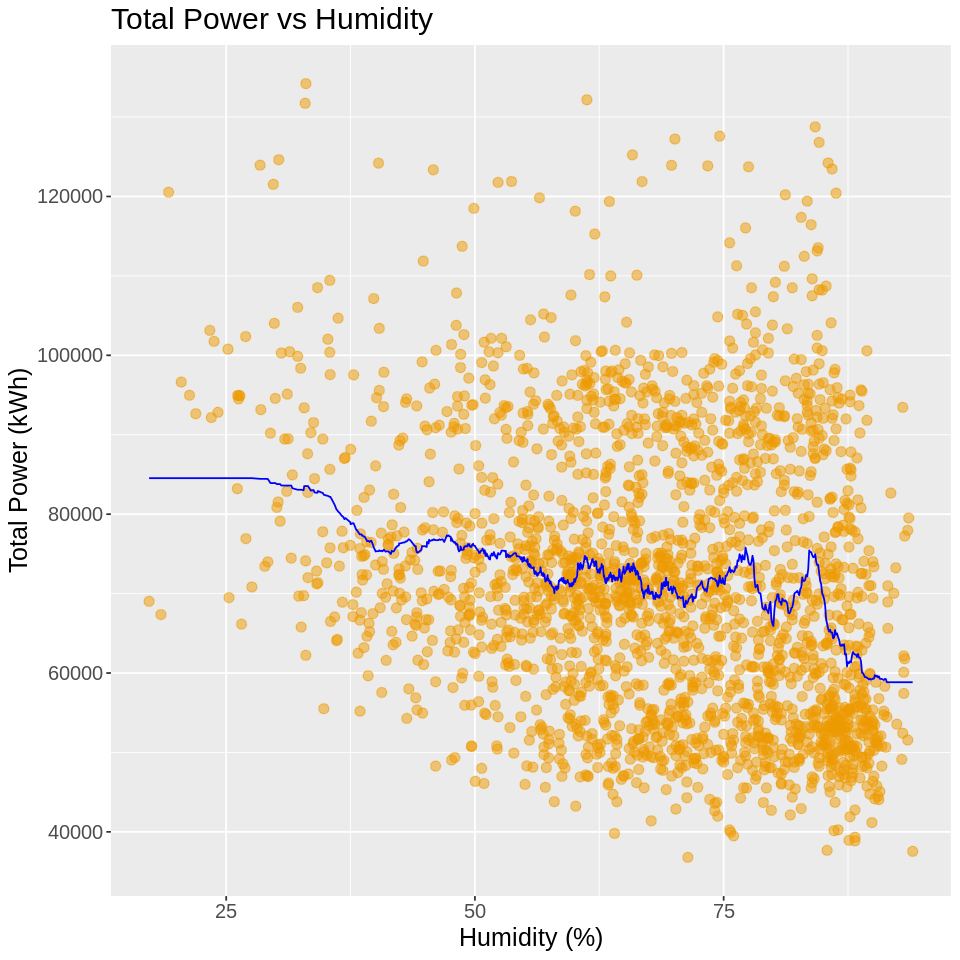

In [12]:
#K-NN Regression Model of the Humidity to Total Power Consumption

Electricity_split <- initial_split(Electricity, prop = 0.75, strata = TotalPower)

Electricity_train <- training(Electricity_split)
Electricity_test <- testing(Electricity_split)


Electricity_recipe <- recipe(TotalPower ~ Humidity, data = Electricity_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())


Electricity_spec <- nearest_neighbor(weight_func = "rectangular", 
    neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")


Electricity_vfold <- vfold_cv(Electricity_train, v = 5, strata = TotalPower)


Electricity_wkflw <- workflow() %>%
  add_recipe(Electricity_recipe) %>%
  add_model(Electricity_spec)


Electricity_wkflw


gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))


Electricity_results <- Electricity_wkflw %>%
  tune_grid(resamples = Electricity_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
Electricity_results


#Prediction 
Electricity_min <- Electricity_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    filter(mean == min(mean)) %>%
    slice(1)
Electricity_min


Electricityk_min <- Electricity_min %>%
          pull(neighbors)


Electricity_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = Electricityk_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")


Electricity_best_fit <- workflow() %>%
          add_recipe(Electricity_recipe) %>%
          add_model(Electricity_best_spec) %>%
          fit(data = Electricity_train)


Electricity_summary_Hum <- Electricity_best_fit %>%
           predict(Electricity_train) %>%
           bind_cols(Electricity_train) %>%
           metrics(truth = TotalPower, estimate = .pred)
Electricity_summary_Hum


Electricity_preds <- Electricity_best_fit %>%
    predict(Electricity_train) %>%
    bind_cols(Electricity_train)
Electricity_preds

options(repr.plot.width = 8, repr.plot.height = 8)
Electricity_plot <- Electricity_preds %>%
    ggplot( aes(x = Humidity , y = TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") + 
    labs(y = "Total Power (kWh)", x = "Humidity (%)") +
    geom_line(data = Electricity_preds, mapping = aes(x = Humidity, y = .pred), color = "blue") +
    scale_y_continuous() +
    ggtitle("Total Power vs Humidity") +
    theme(text = element_text(size = 15))
Electricity_plot

**Wind Power to Total Power Consumption**

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23075.26,5,741.14852,Model01
4,rmse,standard,17761.32,5,330.83432,Model02
7,rmse,standard,16989.02,5,149.57877,Model03
10,rmse,standard,16675.46,5,190.59919,Model04
13,rmse,standard,16421.66,5,188.10441,Model05
16,rmse,standard,16319.84,5,188.80938,Model06
19,rmse,standard,16103.44,5,167.81469,Model07
22,rmse,standard,16042.13,5,147.32791,Model08
25,rmse,standard,16013.01,5,134.52598,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
94,rmse,standard,15825.61,5,100.2088,Model32


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.572348e+04
rsq,standard,1.668144e-01
mae,standard,1.276828e+04


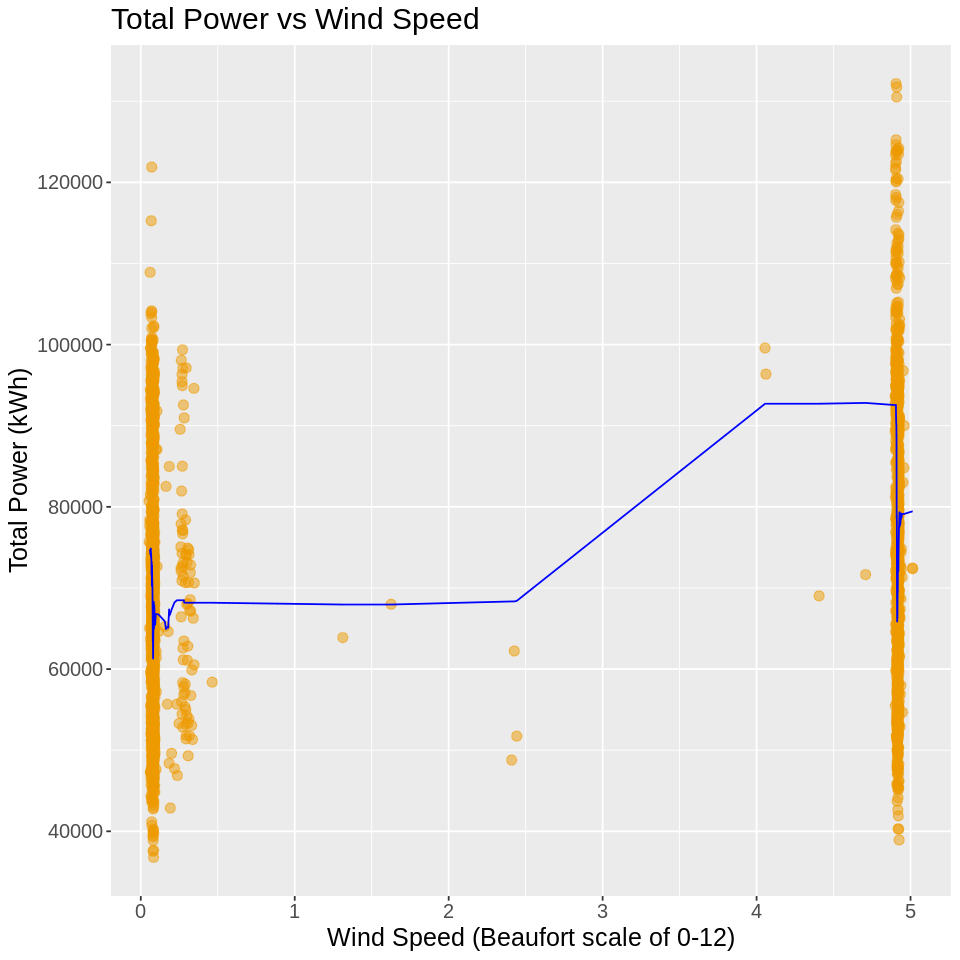

In [13]:
#K-NN Regression Model of the Wind Power to Total Power Consumption


Electricity_split <- initial_split(Electricity, prop = 0.75, strata = TotalPower)
Electricity_train <- training(Electricity_split)
Electricity_test <- testing(Electricity_split)


Electricity_recipe <- recipe(TotalPower ~ Wind.Speed, data = Electricity_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

Electricity_spec <- nearest_neighbor(weight_func = "rectangular", 
    neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")


Electricity_vfold <- vfold_cv(Electricity_train, v = 5, strata = TotalPower)


Electricity_wkflw <- workflow() %>%
  add_recipe(Electricity_recipe) %>%
  add_model(Electricity_spec)
Electricity_wkflw


gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))


Electricity_results <- Electricity_wkflw %>%
  tune_grid(resamples = Electricity_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
Electricity_results

#Prediction 
Electricity_min <- Electricity_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    filter(mean == min(mean)) %>%
    slice(1)
Electricity_min


Electricityk_min <- Electricity_min %>%
          pull(neighbors)


Electricity_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = Electricityk_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")


Electricity_best_fit <- workflow() %>%
          add_recipe(Electricity_recipe) %>%
          add_model(Electricity_best_spec) %>%
          fit(data = Electricity_train)


Electricity_summary_Wind <- Electricity_best_fit %>%
           predict(Electricity_train) %>%
           bind_cols(Electricity_train) %>%
           metrics(truth = TotalPower, estimate = .pred)
Electricity_summary_Wind


Electricity_preds <- Electricity_best_fit %>%
    predict(Electricity_train) %>%
    bind_cols(Electricity_train)

options(repr.plot.width = 8, repr.plot.height = 8)
Electricity_plot <- Electricity_preds %>%
    ggplot( aes(x = Wind.Speed , y = TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") + 
    labs(y = "Total Power (kWh)", x = "Wind Speed (Beaufort scale of 0-12)") +
    geom_line(data = Electricity_preds, mapping = aes(x = Wind.Speed, y = .pred), color = "blue") +
    scale_y_continuous() +
    ggtitle("Total Power vs Wind Speed") + 
    theme(text = element_text(size = 15))
Electricity_plot

**General Diffuse Flows to Total Power Consumption**

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,24794.74,5,326.73161,Model01
4,rmse,standard,18706.22,5,277.43708,Model02
7,rmse,standard,17721.79,5,147.06803,Model03
10,rmse,standard,17317.91,5,120.58680,Model04
13,rmse,standard,17222.73,5,136.96447,Model05
16,rmse,standard,17068.92,5,166.61839,Model06
19,rmse,standard,17022.49,5,178.32236,Model07
22,rmse,standard,16983.81,5,195.79401,Model08
25,rmse,standard,16997.17,5,161.58877,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
124,rmse,standard,16732.72,5,90.59317,Model42


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.658501e+04
rsq,standard,7.847978e-02
mae,standard,1.340280e+04


.pred,DateTime,Temperature,Humidity,Wind.Speed,general.diffuse.flows,diffuse.flows,Zone.1.Power.Consumption,Zone.2..Power.Consumption,Zone.3..Power.Consumption,TotalPower
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71607.78,10/11/2017 16:50,24.29,56.42,0.081,84.700,69.500,35265.82,21853.94,13189.058,70308.82
73281.25,10/19/2017 9:50,19.83,80.20,0.064,49.050,42.640,33765.95,20767.22,12984.802,67517.97
79201.40,4/16/2017 20:00,18.29,68.84,0.079,1.573,1.479,42409.47,21603.67,28282.182,92295.32
68029.39,9/6/2017 0:30,22.92,70.60,0.264,0.066,0.100,31425.13,19092.72,16962.288,67480.14
71326.58,5/2/2017 10:20,23.00,52.65,0.085,535.500,185.600,34270.43,21730.03,15519.352,71519.81
73183.52,4/16/2017 16:30,19.97,62.01,0.073,573.000,602.700,28744.20,15345.82,18589.091,62679.11
69801.03,5/18/2017 18:10,23.99,55.91,4.919,293.300,119.600,33930.49,21221.05,17623.968,72775.51
65236.71,1/21/2017 19:50,12.27,61.64,0.083,0.055,0.119,44366.58,27950.15,26810.602,99127.34
68219.86,8/19/2017 21:00,25.33,86.30,4.919,0.051,0.144,48617.98,33034.85,38761.129,120413.96


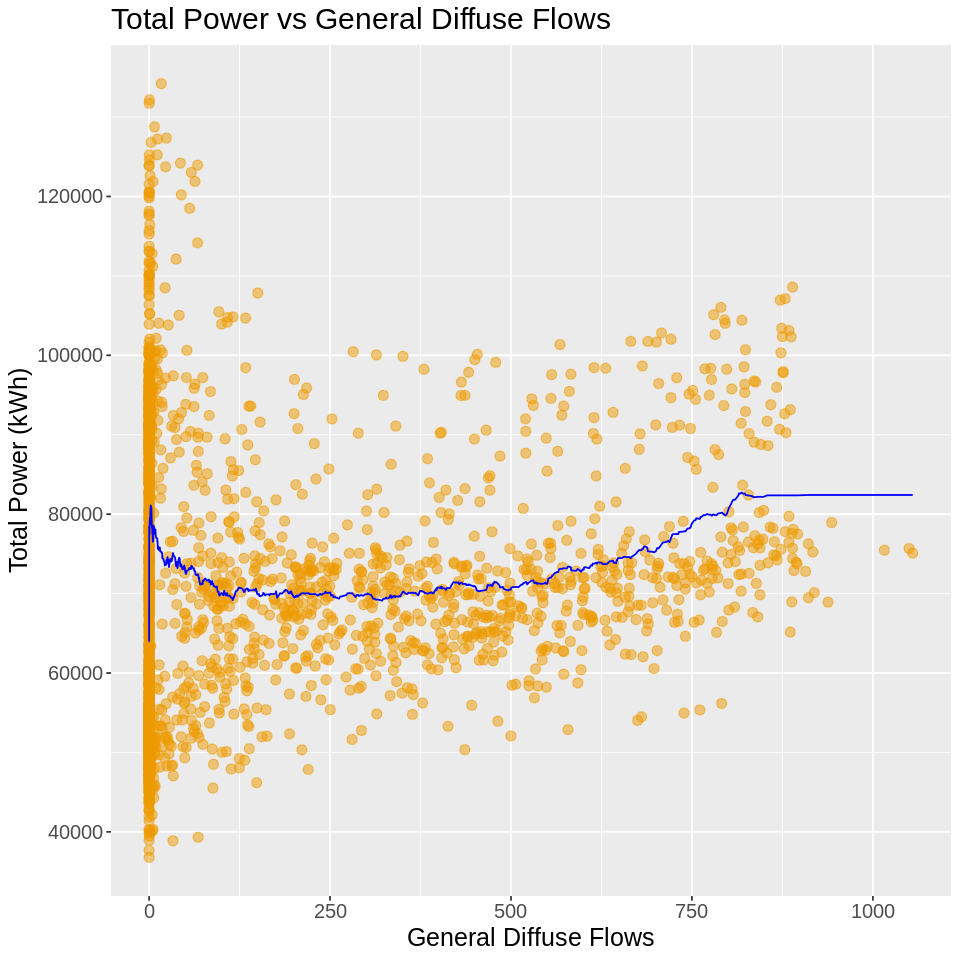

In [14]:
#K-NN Regression Model of the General Diffuse Flows to Total Power Consumption


Electricity_split <- initial_split(Electricity, prop = 0.75, strata = TotalPower)

Electricity_train <- training(Electricity_split)
Electricity_test <- testing(Electricity_split)


Electricity_recipe <- recipe(TotalPower ~ general.diffuse.flows, data = Electricity_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())


Electricity_spec <- nearest_neighbor(weight_func = "rectangular", 
    neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")


Electricity_vfold <- vfold_cv(Electricity_train, v = 5, strata = TotalPower)

Electricity_wkflw <- workflow() %>%
  add_recipe(Electricity_recipe) %>%
  add_model(Electricity_spec)

Electricity_wkflw

gridvals <- tibble(neighbors = seq(from = 1, to = 200, by = 3))

Electricity_results <- Electricity_wkflw %>%
  tune_grid(resamples = Electricity_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# show the results
Electricity_results

#Prediction 
Electricity_min <- Electricity_results%>%
    filter(.metric == "rmse") %>%
    arrange(mean) %>% 
    filter(mean == min(mean)) %>%
    slice(1)


Electricity_min


Electricityk_min <- Electricity_min %>%
          pull(neighbors)


Electricity_best_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = Electricityk_min) %>%
          set_engine("kknn") %>%
          set_mode("regression")


Electricity_best_fit <- workflow() %>%
          add_recipe(Electricity_recipe) %>%
          add_model(Electricity_best_spec) %>%
          fit(data = Electricity_train)


Electricity_summary_GenD <- Electricity_best_fit %>%
           predict(Electricity_train) %>%
           bind_cols(Electricity_train) %>%
           metrics(truth = TotalPower, estimate = .pred)


Electricity_summary_GenD


Electricity_preds <- Electricity_best_fit %>%
    predict(Electricity_train) %>%
    bind_cols(Electricity_train)
Electricity_preds

options(repr.plot.width = 8, repr.plot.height = 8)
Electricity_plot <- Electricity_preds %>%
    ggplot(aes(x = general.diffuse.flows , y = TotalPower)) +
    geom_point(size = 2.5, alpha = 0.5, color = "orange2") + 
    labs(y = "Total Power (kWh)", x = "General Diffuse Flows") +
    geom_line(data = Electricity_preds, mapping = aes(x = general.diffuse.flows, y = .pred), color = "blue") +
    scale_y_continuous() +
    ggtitle("Total Power vs General Diffuse Flows") +
    theme(text = element_text(size = 15))
Electricity_plot

**Summary of RMSE, RSQ values for the parameters of Temperature, Humidity, Wind Speed, and General Diffuse Flows**


Temperature to Total Power 

In [15]:
Electricity_summary_Temp

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.469347e+04
rsq,standard,2.767591e-01
mae,standard,1.181196e+04


Humidity to Total Power 

In [16]:
Electricity_summary_Hum

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.644504e+04
rsq,standard,9.763745e-02
mae,standard,1.324670e+04


Wind Speed to Total Power

In [17]:
Electricity_summary_Wind

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.572348e+04
rsq,standard,1.668144e-01
mae,standard,1.276828e+04


General Diffuse Flow to Total Power

In [18]:
Electricity_summary_GenD

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.658501e+04
rsq,standard,7.847978e-02
mae,standard,1.340280e+04


### Discussion

><p>&emsp;In our project, we used the method of k-nn regression. Four parameters were used to predict the total power consumption of Tetouan City: temperature, humidity, wind speed, and general diffuse flows. In the metadata, we can see that the diffuse flows data was also collected. However, we chose to use general diffuse flows as one of the parameters instead of diffuse flows. This is because the parameter of general diffuse flows is a more comprehensive variable in summarizing the data. We also combined the power consumption from Zone 1, Zone 2, and Zone3 into the new “Total Power” column to help us in determining the power consumption of all of Tetouan.</p>
><p>&emsp;From the data analysis, we found that the temperature had the strongest positive correlation (0.51) and general diffuse flows had the lowest positive correlation (0.14). Wind speed had relatively moderate correlation (0. 24). There was also one negative correlation— the correlation between the parameter of humidity and the total power consumption (-0.25). By comparing these four parameters, we determined the general trend: as general diffuse flows, wind speed, and temperature increase, total power consumption increases as well; as humidity increases, total power consumption decreases.
><p>&emsp;The rmse and rsq values from the k-nn regression model helped us identify the linear relationship between parameters and predicted class. We found that although each parameter produced large rmse values, temperature produced a relatively small rmse value (1.47e+04). The relatively large rmse value may have been caused by sampling variability since we only chose 3000 samples from the data. In future studies, this issue can be resolved by repeating the model with larger sample sizes. The rsq value of temperature (2.77e-01) was also higher than others since it had the correlation value closest to 1. This observation supports our previous finding of temperature having the strongest correlation coefficient among the four parameters.
><p>&emsp;We correctly anticipated a strong positive correlation between temperature because higher temperatures have been found to increase electricity demand in previous studies (Santamouris et al., 2014). We also correctly anticipated to find lesser correlation between total power consumption and the other parameters, since we expected temperature to have the strongest impact on power use.
><p>&emsp;Our research allows for the prediction of total power consumption in Tetouan. Our findings have high applicability because of the importance of monitoring, then working to reduce, power consumption. Researchers would be able to share our data with corporations and officials in Tetouan, hopefully leading to better management of power consumption within the city. Doing so would promote the optimization and sustainable use of electricity. 
><p>&emsp;Our findings also lead us to a few questions for future research. Since our dataset only consists of information from one city, our findings cannot be accurately applied to make conclusions about different areas and regions. We are curious about if and how the results of our study would change if applied to a dataset from a different city, especially if that city lies in a different biome from Tetouan. Additionally, the large rmse value in our project leads us to pose the question of whether alternative parameters could be used to build a stronger regression model. In future studies, different parameters could be chosen from the dataset in order to increase viability in predicting total power consumption in Tetouan.

### References

>Angrisani, L., Bonavolontà, F., Liccardo, A., Moriello, R., & Serino, F. (2018). Smart power meters in augmented reality environment for electricity consumption awareness. Energies (Basel), 11(9), 2303. https://doi.org/10.3390/en11092303

>Salam, A., & Hibaoui, A. E. (2018). Comparison of Machine Learning Algorithms for the Power Consumption Prediction : - Case Study of Tetouan city –. 2018 6th International Renewable and Sustainable Energy Conference (IRSEC). https://doi.org/10.1109/irsec.2018.8703007

>Santamouris, M., Cartalis, C., Synnefa, A., & Kolokotsa, D. (2015). On the impact of urban heat island and global warming on the power demand and electricity consumption of buildings—A review. Energy and Buildings, 98, 119-124. https://doi.org/10.1016/j.enbuild.2014.09.052